# <font color=red> Software Developer Foundations - Final Hackathon </font>
# Fortune 500

Welcome to the final Hackathon! We've come a long way and learned a lot about Python and Data Science. For this project, we're going to create a Python Program that **lets a user enter a year** and **displays a graph of the Revenue** for each of the **top 15** Fortune 500 companies for that year.

To complete this Hackathon project, we'll be using the following skills:

* Interacting with the User
* Creating and Using Functions
* Using While Loops to Prevent a User from moving forward until data meets a specific condition
* Using Pandas to load data from a CSV File
* Using Matplotlib to Create and Display a Graph

If you feel rocky on any of these skills, I'd recommend keeping the following Colab Documents open in another tab for reference:

* Functions (Lecture)
* Data Visualization with Matplotlib and Pandas (Lecture)
* Working with the Pandas Data Analysis Library (Lecture)
* Data Analysis with Pandas (Lecture)
* Matplotlib and Pandas (Workshop)
* While Loops (**Doug's Notes**)

You'll have a portion of instructions/guidance in the form of text cells, and then code cells to fill in/interact with. Make sure to follow the instructions **carefully** and **don't get ahead of yourself**. Please **only** do what the instructions are asking you to do.

To be clear, **you will _not_ be doing all of your work in a single Code Cell.**

The final program will do the following:

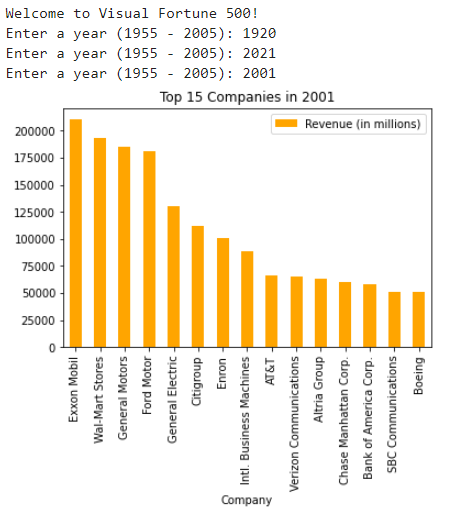

Good luck, and have fun!

# Part 1: Loading in the Data

## The Fortune 500 Dataset

Before we start laying down code, we need to get familiar with the dataset we'll be working with, so we can understand how to create a proper solution.

Our data is stored in `fortune500.csv` 

It should be shared with you through Slack in the #class-materials channel, but it can also be found by [clicking here](https://drive.google.com/file/d/1Nxs8P2MVMmOhDFwQve8rQZM2aLng_KmC/view?usp=sharing).

Take a moment to **open the file, and view it's contents**.

The data looks something like this:

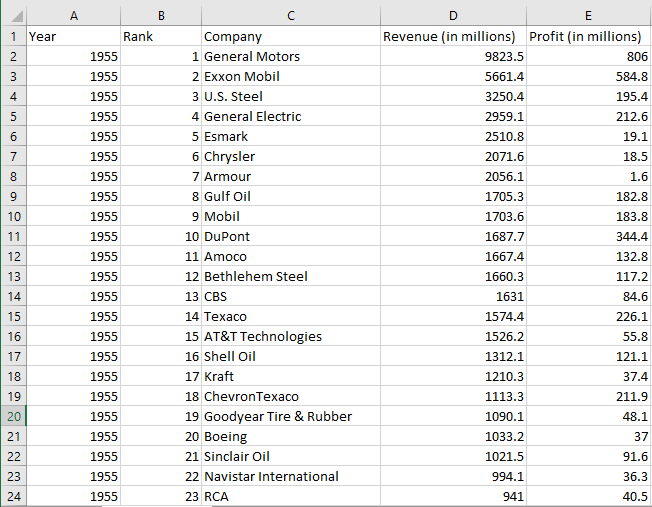

The entire dataset itself shows the "Fortune 500" Companies for _each year_, from 1955 to 2005. It represents what _rank_ each company is (from 1 to 500), and what their _Revenue_ and _Profit_ was for that year.

It is a **massive dataset** with **over _25,000_ rows**.

There are **500 rows per year** - each row represents the information for a Fortune 500 company on a given year. So, companies like "General Motors" may have **more** than one **row** in the database, one for each year they qualified to be a Fortune 500 company. If they were a Fortune 500 company for three years, there would be **three** rows for that company in the dataset.



It has _five_ columns:

* **Company**, the Name of a given Fortune 500 Company
* **Revenue**, the total amount of money the company made that year
* **Profit**, the amount of money the company made _minus_ the amount they _spent_ (which means it can be a negative number)
* **Year**, which represents the year that this row of information is for
* **Rank**, the rank of the company in the Fortune 500 (can be 1 to 500, where 1 is the top company)

You should feel comfortable with what this dataset is, and how it is composed before moving forward.

**Using the code cell below, do the following:**
* Upload `fortune500.csv` using the Code Cell below

**Feeling Stuck?**
* For more on **reading in CSV Data**, refer to _"Step 1: Importing the Modules, Importing the Data"_ from _"Matplotlib and Pandas (Workshop)"_

**You know you're done when:**
* You can see `fortune500.csv` in Google Colab. Click on the "folder" icon on the left-hand side of Google Colab to see the files you've uploaded.
---


In [1]:
from google.colab import files
uploaded = files.upload()

Saving fortune500.csv to fortune500.csv


**When you can see the file in Google Colab, you may move on. Remember that if you leave Colab open for too long, or re-load the page, you MUST repeat this step.**

## Reading in the CSV File

Now we want to load the data _into Python_ from the CSV file. To do that, we'll be using the **Pandas** module.

Recall that the core data structure that the Pandas module uses is called a **Dataframe**. Our goal for this step is to simply load in a CSV File as a Dataframe, **WITHOUT performing any filtering, grouping, or cleaning** yet.

**Using the code cell below, do the following:**
* Import the Pandas Module, and use `pd` for it's **alias**
* Load the data from `fortune500.csv` as a **Dataframe**.
 * Do NOT perform any filtering, grouping, or cleaning on the dataframe yet. We will do that in a separate step.
* Call `.head()` on your dataframe to see the first few values

**Feeling Stuck?**
* For more on **importing a module with an alias**, refer to _"Out of the Box"_ from _"Objects & Modules (Lecture)"_
* For more on **importing the data with Pandas**, refer to _"Creating a Dataframe from a CSV File"_ from _"Working with the Pandas Data Analysis Library (Lecture)"_
* For more on `.head()`, refer to _"Begin Investigating the Data in the Dataset"_ in _"Working with the Pandas Data Analysis Library (Lecture)"_

**You know you're done when:**
* You see the following output upon running this code cell:


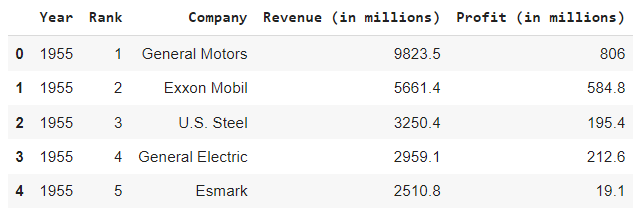

---

In [4]:
#Import pandas
import pandas as pd

#assign file into variable
f500_csv = "fortune500.csv"

#read file into dataframe
df = pd.read_csv(f500_csv)

pd.options.display.max_rows = None

#print first 5 values in dataframe
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


# Part 2: The Filter Function

Next, we want to create a **Python Function** that **takes in our dataframe from Part 1**, and **returns a NEW dataframe** that ONLY contains the rows for the TOP 15 companies on a given YEAR.

**Why a function?** First of all, remember that functions should be used to handle a **specific task**. In this case, taking in a Dataframe with the data from `fortune500.csv`, and filtering it down to a new Dataframe is a specific task.

But also, consider that our final program should allow the user to type in _ANY_ year between 1955 and 2005, inclusive. Then, it should _only_ use the rows from _that_ year to create it's graph. We know that functions can take in "outside information" through **parameters**, then act accordingly based on their values.

So, we should have a function that filters down our data, _similar_ (but not exact) to the following:

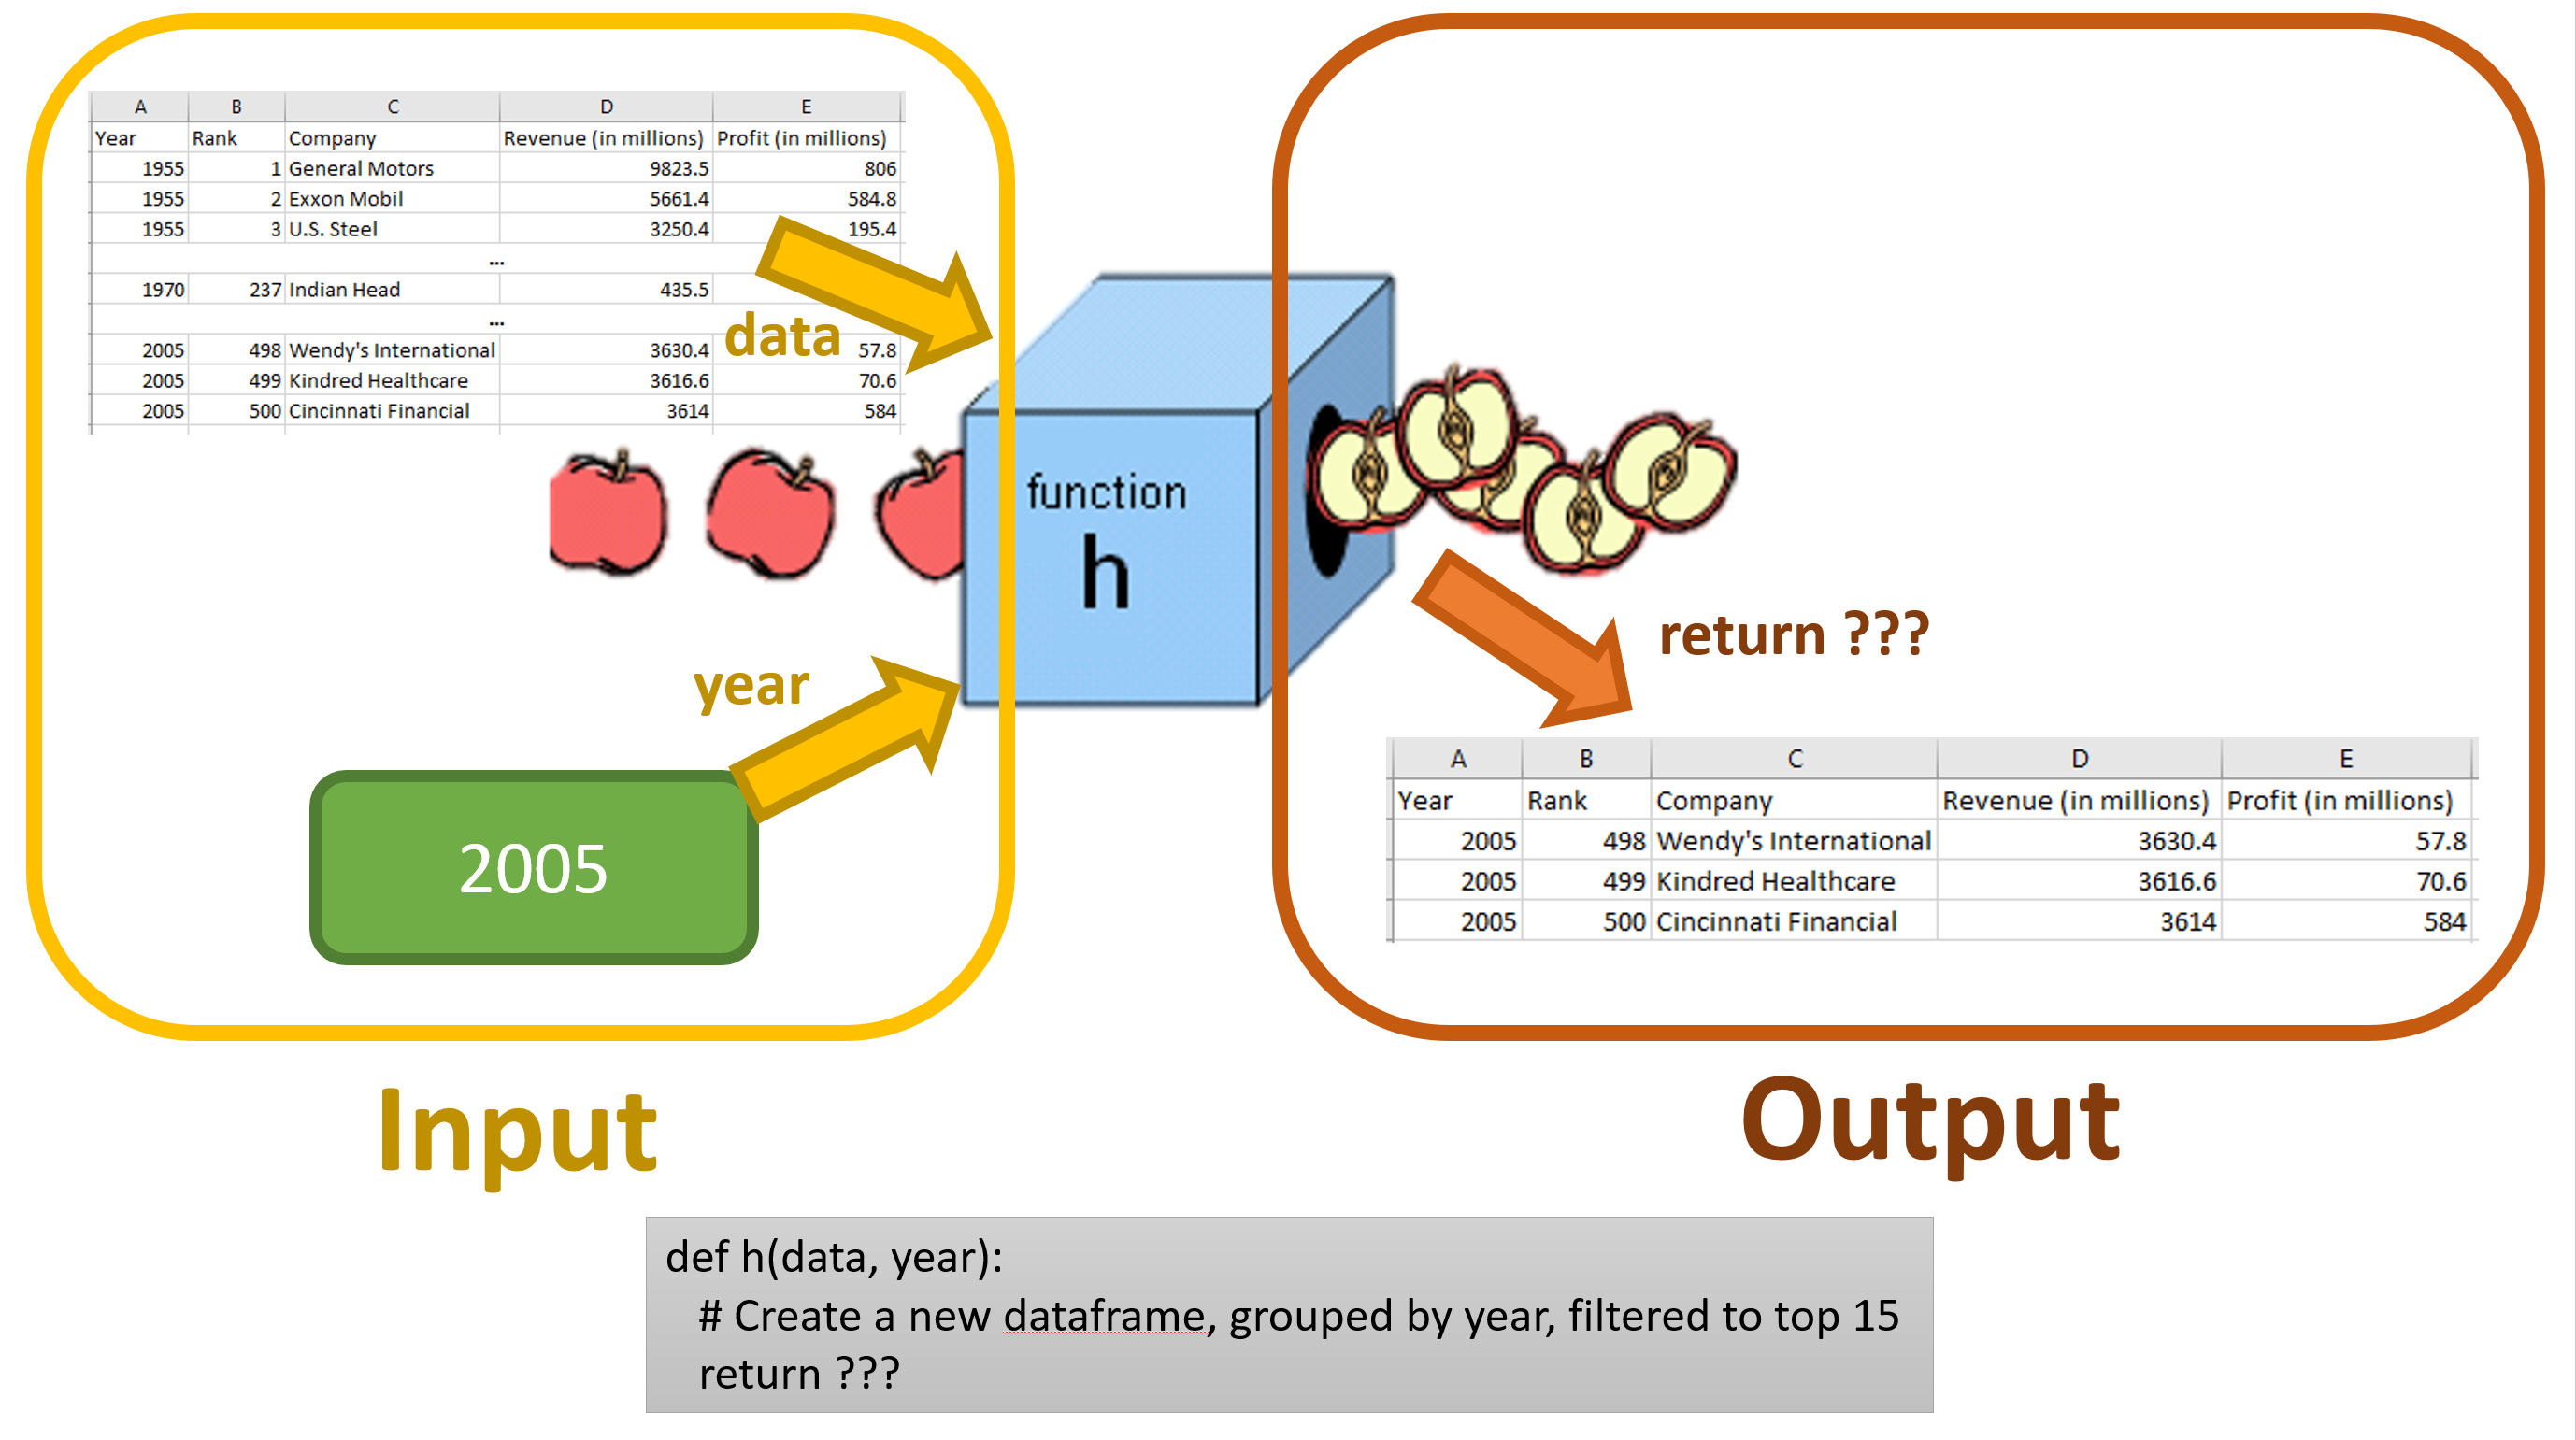

This might feel overwhelming, but as with any problem we need to break it down into smaller steps.

Before we worry about the "function" part of the problem, let's come up with the body by itself - what the filtering should look like, and how to test it.

## The First Subset - Year

If the first step to writing a function is understanding _what it should do_, the second step is to figure out what the code inside it's body should look like.

We know that ultimately it should return a **subset of our Dataframe**. Specifically, it should be the Top 15 Companies for a Given Year. 

But before we worry about the "Top 15 Companies" part, let's start by **just grabbing the data for a given year.**

For testing purposes, let's choose **1985** as the year we'd like to select. It doesn't matter which year you choose really, but you need to choose one.



**Using the code cell below, do the following:**
* Create a **new** dataframe **just for testing** that only has the entries for **1985**, using the `loc[]` syntax
 * We are not using this data, we're just testing to make sure our **filter condition**/expression is correct, so we **don't have to worry** about getting it right when we create our function later
 * Select **all** 500 companies at this point, do **not** filter down to the top 15 yet
* Call `.info()` on your **new** dataframe to see how many entries it holds

**Tips:**
* Pandas should have brought the "Year" column in as an integer, so make sure to use an integer when creating your expression
* Recall that `.info()` is called using the same syntax as `.head()` 
 * You can also use `.head()` as a sanity check, to make sure you have the right data - but you can only use one or the other at a time, so test with one then do the
* Make sure to use `==` instead of `=` when comparing

**Feeling Stuck?**
* For more on **filtering a dataframe**, refer to _"Using `loc` to display any subset of the DataFrame"_ from _"Working with the Pandas Data Analysis Library (Lecture)"_
* If you're not sure how to come up with the expression to pass into `loc[]`, you can brush up on **creating expressions** in _"Control Flow (Lecture)"_

**You know you're done when:**
* You see the following output upon running this code cell:

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 15000 to 15499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   500 non-null    int64  
 1   Rank                   500 non-null    int64  
 2   Company                500 non-null    object 
 3   Revenue (in millions)  500 non-null    float64
 4   Profit (in millions)   500 non-null    object 
dtypes: float64(1), int64(2), object(2)
```
Note the "500 entries, 15000 to 15499" portion - _that's_ the part that should be correct. When you've narrowed it down to 500 entries in that range, it is working correctly.

---

In [11]:
#place entries with year 1985 into df1985
df1985 = df[(df['Year']==1985)]

#get info about df1985
df1985.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 15000 to 15499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   500 non-null    int64  
 1   Rank                   500 non-null    int64  
 2   Company                500 non-null    object 
 3   Revenue (in millions)  500 non-null    float64
 4   Profit (in millions)   500 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 23.4+ KB


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
15000,1985,1,Exxon Mobil,90854.0,5528
15001,1985,2,General Motors,83889.9,4516.5
15002,1985,3,Mobil,56047.0,1268
15003,1985,4,Ford Motor,52366.4,2906.8
15004,1985,5,Texaco,47334.0,306


## The Second Subset - Top 15

Now that we've written the right code to create a dataframe that selects a specific year, we need to add a condition that only selects entries with a Rank of 15 or less.

To be clear, for this step, you will be creating another temporary dataframe that filters on **both** conditions. This will **not re-use** anything you did in the section _"The First Subset - Year"_.

There are two approaches to this:

* **Do it in two steps**. Filter first by year, then by top 15:

```
# Filter by Year
temp_df = df.loc[???]

# Filter by Top 15
temp_df = temp_df.loc[???]
```

* **Use `&` to combine expressions**. Unlike Python expressions that use the `and` keyword, Pandas expressions use a single `&`. If you do this, the **parentheses are required** (see below).

```
# Filter by Year and Keep the Top 15
temp_df = df.loc[(???) & (???)]
```

Since we're selecting the _Top 15_ companies for a _single year_, the final dataframe should have **15 entries**.

**Using the code cell below, do the following:**
* Create **another new** dataframe **just for testing** that only has the entries for **the Top 15 Companies in 1985**, using the `loc[]` syntax
 * Like before, we are not using this data, we're just testing to make sure our **filter condition**/expression is correct, so we **don't have to worry** about getting it right when we create our function later
 * The final dataframe should have 15 entries in it
* Call `.info()` on your **new** dataframe to see how many entries it holds

**Feeling Stuck?**
* Remember that the "Rank" column is used to determine the "Top 15" companies
* For more on **filtering a dataframe**, refer to _"Using `loc` to display any subset of the DataFrame"_ from _"Working with the Pandas Data Analysis Library (Lecture)"_

**You know you're done when:**
* You see the following output upon running this code cell:

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 15000 to 15014
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   15 non-null     int64  
 1   Rank                   15 non-null     int64  
 2   Company                15 non-null     object 
 3   Revenue (in millions)  15 non-null     float64
 4   Profit (in millions)   15 non-null     object 
dtypes: float64(1), int64(2), object(2)
```
This time, you should see "15 entries, 15000 to 15014" on the second line

---

In [21]:
#Filter by year and rank
temp_df = df.loc[(df['Rank']<= 15) & (df['Year'] == 1985)] 

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 15000 to 15014
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   15 non-null     int64  
 1   Rank                   15 non-null     int64  
 2   Company                15 non-null     object 
 3   Revenue (in millions)  15 non-null     float64
 4   Profit (in millions)   15 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 720.0+ bytes


## Wrapping it into a Function

Now that we have the proper expressions for filtering a dataframe, let's wrap that code up into a function that we can use later.

The function should have **two parameters** - the year we want to filter by, and the dataframe we want to filter. Recall that your parameter names are to data what **aliases** are to modules - placeholder values. They allow you to "abstract" away the "main program" and focus on the task at hand.

With that in mind, once you setup a function definition with those parameters, the body of the function should create a filtered dataframe using the same code you made in _"The Second Subset - Top 15"_.

But before the function ends, it should use the `return` keyword to pass the new dataframe you made _back_ to the main program.

**Functions Review:**

As a brief refresher of how to make and use functions, consider a function that takes in a string and returns the "first word" in that string:

```
def firstWord(sentence):
  words = sentence.split(" ")
  return words[0]
```

The parameters are defined inside the parentheses on the first line, and can then be used inside the function. The `return` keyword is placed in front of a value you want the function to "pass back" to the main application.

So if I wanted to use this with the sentence "Welcome to UMBC!", I'd write the following code:

```
single = firstWord("Welcome to UMBC!")
print(single)
```

And under the hood, it would set `sentence` as an alias for "Welcome to UMBC!" (i.e. it has the same value). Then, when the function is called, the first line will be "temporarily replaced with" the first word, like so:

```
single = "Welcome" # <== the returned value from firstWord()
print(single)
```

**Using the code cell below, do the following:**
* Create **a function** that takes in a **dataframe** and a **year** that returns a **new dataframe** which has been filtered to the "Top 15" companies for that year.
 * The function **must** be named `getDataByYear`, the first parameter must take in the **original Dataframe**, and the second parameter must take in the **desired year**
 * This function will be **re-used** in the final section
 * When writing the function body, you will need to replace `1985` with the parameter that was passed in for year.
* Test the function by running the provided code cell (titled "Provided Code - Testing getDataByYear()") _at the bottom of this section_

**Feeling Stuck?**
* For more on **creating a function**, refer to _"Building a Block"_ from _"Functions (Lecture)"_
* If you are having trouble getting started, and you've given it a good try, [click here](https://pastebin.com/raw/XnBf9LKM) to see our provided starting point.

**You know you're done when:**
* You see the following output _from the provided code cell at the bottom of the section_: `Your Function Works!!`

**The code cell you write in will not show anything when you run it, because it is just a function definition. This is NORMAL and EXPECTED.**

---


In [23]:
def getDataByYear(new_df, year):
  temp_df = df.loc[(df['Rank']<= 15) & (df['Year'] == year)]
  return temp_df

In [24]:
#@title Provided Code - Testing getDataByYear()
import pandas as pd

try:
  __originaldf = pd.read_csv('fortune500.csv')
  __newdf = getDataByYear(df, 1972)
  __result = __newdf["Company"].iloc[4] == "Intl. Business Machines"
  if(__result):
    print("Your Function Works!!")
  else:
    print("Your Function Does Not Return the Right Value")
except NameError:
  print("You did not define your function with the correct name...")
except:
  print("Your Function crashed the test program!")
  print("It encountered this issue: ")
  print(sys.exc_info()[0])

Your Function Works!!


# Part 3: The Graph Function

## Function Overview

Now that the data setup is complete, our next goal is to create a function that makes a Bar Graph with our data.

Just like the function we just made, our next function is also going to take in a dataframe, but this time it will also take in a "Title" for the graph as a second parameter.

Why are we making these functions? The final step of this project will be to create a brief menu that interacts with the user, and chooses what data to display. These functions allow us to test _specialized_ portions of our program before we have to _tie them together_.

In other words, the goal of these two functions is to allow your data to flow as follows:

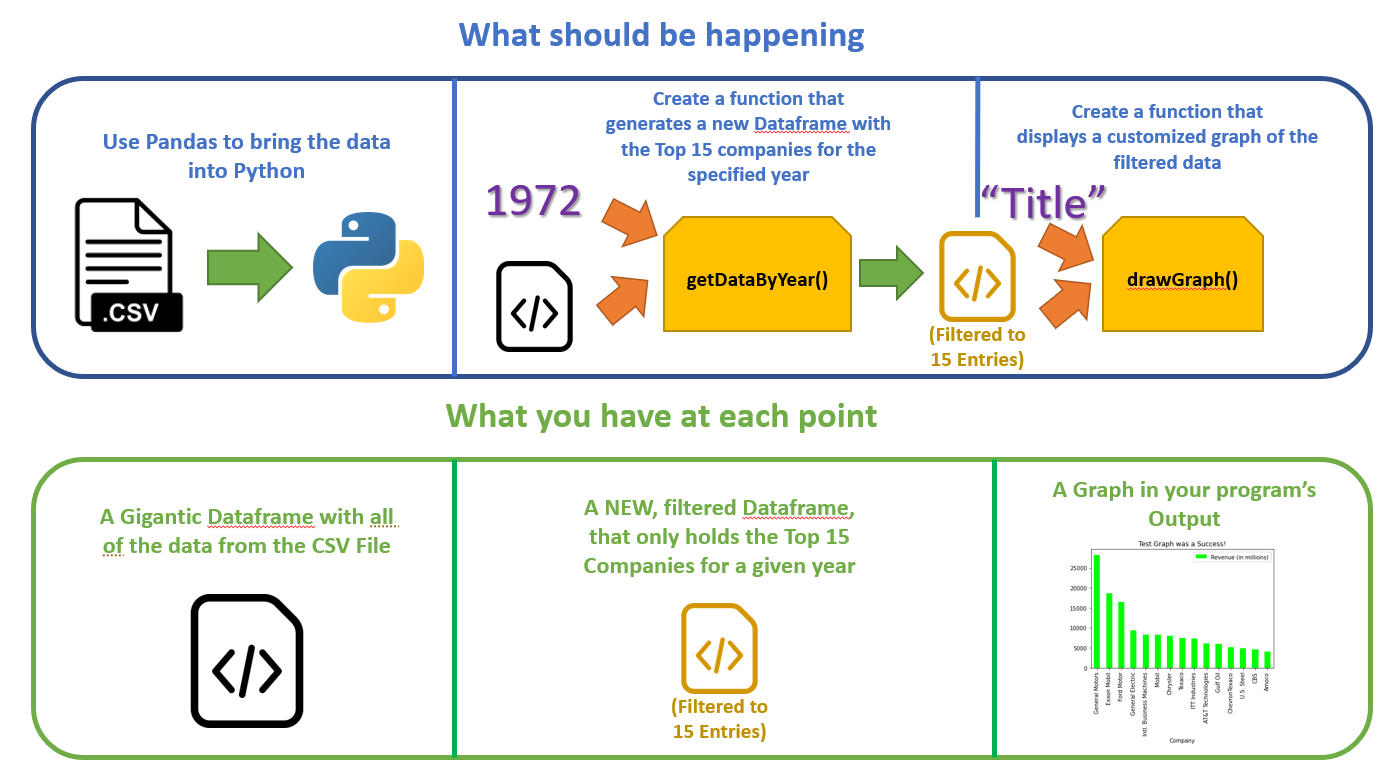

And we are currently on the _third_ step in the graphic above. The function we're designing should expect to take in the _filtered dataframe_ generated by the previous function we made.

Don't forget to import `matplotlib.pyplot` with the appropriate alias - you haven't done that yet.

## Creating the Function

**Using the code cell below, do the following:**
* **Import** the Matplotlib module using `plt` as it's alias
 * Remember to import `matplotlib.pyplot` and not just `matplotlib`
* Create **a function** that takes in a **dataframe** and a **title for your graph** that displays a **Bar Graph** with a **custom color and title**.
 * The function **must** be named `drawGraph`, the first parameter must take in the **original Dataframe**, and the second parameter must take in the **desired title for your graph**
 * This function will be **re-used** in the final section
 * You may choose any custom color you'd like, don't just copy the example
 * This function **does not return anything**. Instead, it will end by calling `plt.show()` to display the graph
* Test the function by running the provided code cell (titled "Provided Code - Testing drawGraph()") _at the bottom of this section_

**Feeling Stuck?**
* Remember that the name of the Revenue column is "Revenue (in millions)". You could either rename that column, or remember to use it's full name when setting the y-axis for your bar graph
* Double check that you imported `matplotlib.pyplot as plt` and not `matplotlib as plt`
* For more on **creating a graph**, refer to _"Visualizing Data with Matplotlib"_ from _"Data Visualization with Matplotlib and Pandas (Lecture)"_
* For more on **customizing the color and title** of a graph, refer to _"Charting a Better Course"_ from _"Data Visualization with Matplotlib and Pandas (Lecture)"_
* For more on **creating a function**, refer to _"Building a Block"_ from _"Functions (Lecture)"_
* If you are having trouble getting started, and you've given it a good try, [click here](https://pastebin.com/raw/XnBf9LKM) to see our provided starting point.

**You know you're done when:**
* You run the provided code cell below, and it displays a bar graph of the following data, with the title "Test Graph was a Success!", like so:


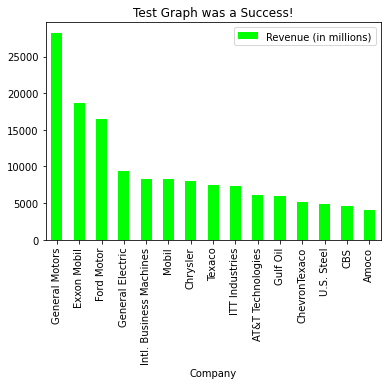

**The code cell you write in will not show anything when you run it, because it is just a function definition. This is NORMAL and EXPECTED.**

---

In [43]:
#import Matplotlib
import matplotlib.pyplot as plt

def drawGraph(odf, title):
    odf.plot.bar(x='Company',y='Revenue (in millions)',color='lightgreen')
    plt.title(title)
    plt.show()

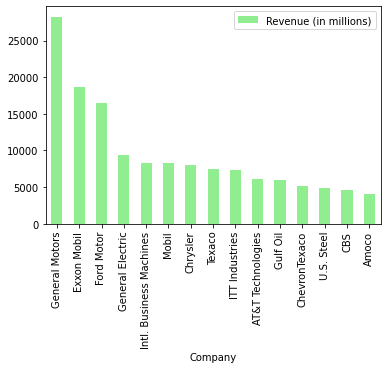

In [33]:
#@title Provided Code - Testing drawGraph()
import pandas as pd
import matplotlib.pyplot as plt

try:
  __originaldf = pd.read_csv('fortune500.csv')
  __newdf = getDataByYear(df, 1972)
  drawGraph(__newdf, "Test Graph was a Success!")
except NameError:
  print("You did not define your function with the correct name...")
  print(sys.exc_info()[0])
except:
  print("Your Function crashed the test program!")
  print("It encountered this issue: ")
  print(sys.exc_info()[0])

# Part 4: Creating the Fortune 500 Program

## The Final Program Overview

Now that we've created our functions and made a solid game plan, the last step is to tie it all together as a program that interacts with a user.

**How is that different from what we've done before?** Up until now, we've just been planning and creating pieces of the whole program. Now, we're going to use all of them to make a single code cell that lets a user select a year and see the appropriate data based on that year.

From here, our goal is to do the following:

* Prompt the user to enter a year they'd like to see the Top 15 Companies for
 * Remember that they CANNOT enter a year less than 1955 or greater than 2005. If they do, RE-PROMPT the user to enter a year, and repeat this **UNTIL** they enter a year within the appropriate timeframe
* Display the graph for the selected year
 
The title of the graph **should follow this format**: `Top 15 Companies in <YEAR>`, where '<YEAR>' should be replaced with the year that the **user entered**.

Overall, the majority of the "work" you've already done - loading in the dataframe, filtering the data, and displaying a graph is as simple as calling two functions.

That said, **do not** use any dataframe variables you "pre-filtered" in a previous step. Consider this step a **new step** that may **ONLY re-use the functions you created**.

But the main un-written part of this section is taking in user input and looping until they enter a valid year. To illustrate this, observe the output from a successful solution below, and how it reacts to what the user types in:

```
Welcome to Visual Fortune 500!
Enter a year to view (1955 - 2005): 2010
Enter a year to view (1955 - 2005): 2021
Enter a year to view (1955 - 2005): 1920
Enter a year to view (1955 - 2005): 1983
<Graph will Display at This Point>
```

That's it - just using a while loop for validation and calling functions. You're almost there!

**Using the code cell below, do the following:**
* **Greet** the user with a welcome message, such as "Welcome to Visual Fortune 500!" or "Hello User!"
* **Load in the data** from `fortune500.csv` into a dataframe
* Prompt the user to enter a year to view
 * If the year is not between 1955 and 2005, **repeat** this step until they enter a valid year
 * You do **not** need to handle scenarios where the user enters something other than an integer. **Assume** they always will.
* **Call** `getDataByYear()`, using the appropriate year entered by the user, and the dataframe you loaded in at the start of the code cell to get your filtered dataframe
* **Call** `drawGraph()` to display the graph to the user
 * Use an **f-string** to create the title of the graph in the following format (`Top 15 Companies in <YEAR>`, as seen above) using the year that the user typed in
 * i.e. If the user requested the data for 1986, the title of the graph should be "Top 15 Companies in 1986", and so on

**Feeling Stuck?**
* It might feel like it's been a while, but don't forget to **convert** the value returned from `input()` to an **integer** (it is a string by default)
* Remember to store the result when calling `getDataByYear()`, as the result is the dataframe you need to use in `drawGraph()`
* For more on **calling a function**, refer to _"Functions (Lecture)"_. Remember it's the same syntax as calling `input()` or `print()`.
* For more on **preventing user input using a loop**, refer to _"Example: Input Validation"_ from _"While Loops (Doug's Notes)"_

**You know you're done when:**
* You run the provided code cell below, and the following input leads to the following output:


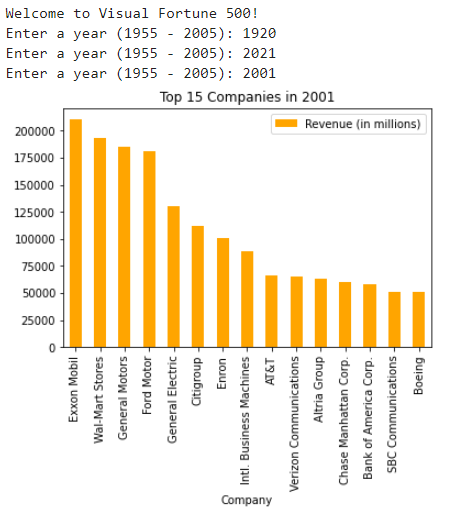

---

Welcome to Visual Fortune 500!
Enter a year (1995 - 2005): 1920
Enter a year (1995 - 2005): 2021
Enter a year (1995 - 2005): 2001


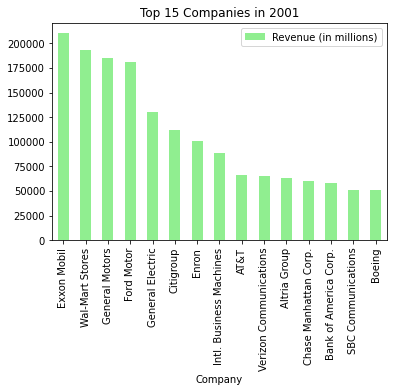

In [44]:


#Import pandas
import pandas as pd

#Load fortune500 into dataframe
f500_csv = "fortune500.csv"
df = pd.read_csv(f500_csv)
pd.options.display.max_rows = None

userInput = ''
userYear = 0

print('Welcome to Visual Fortune 500!')

while (userYear < 1995 or userYear > 2005):
  userInput = input('Enter a year (1995 - 2005): ')
  userYear = int(userInput)

#Sort df by year
filter_df = getDataByYear(df, userYear)

drawGraph(filter_df, f"Top 15 Companies in {userYear}")